## Rによる統計的学習入門　2章演習問題　応用編
Pythonで解いていきます

データセットはKaggleのDatasetから取得  
https://www.kaggle.com/datasets/ishaanv/ISLR-Auto?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### (8) (a) ~ (c)

In [2]:
# データ読み込み
college = pd.read_csv('../data/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# データの要約
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


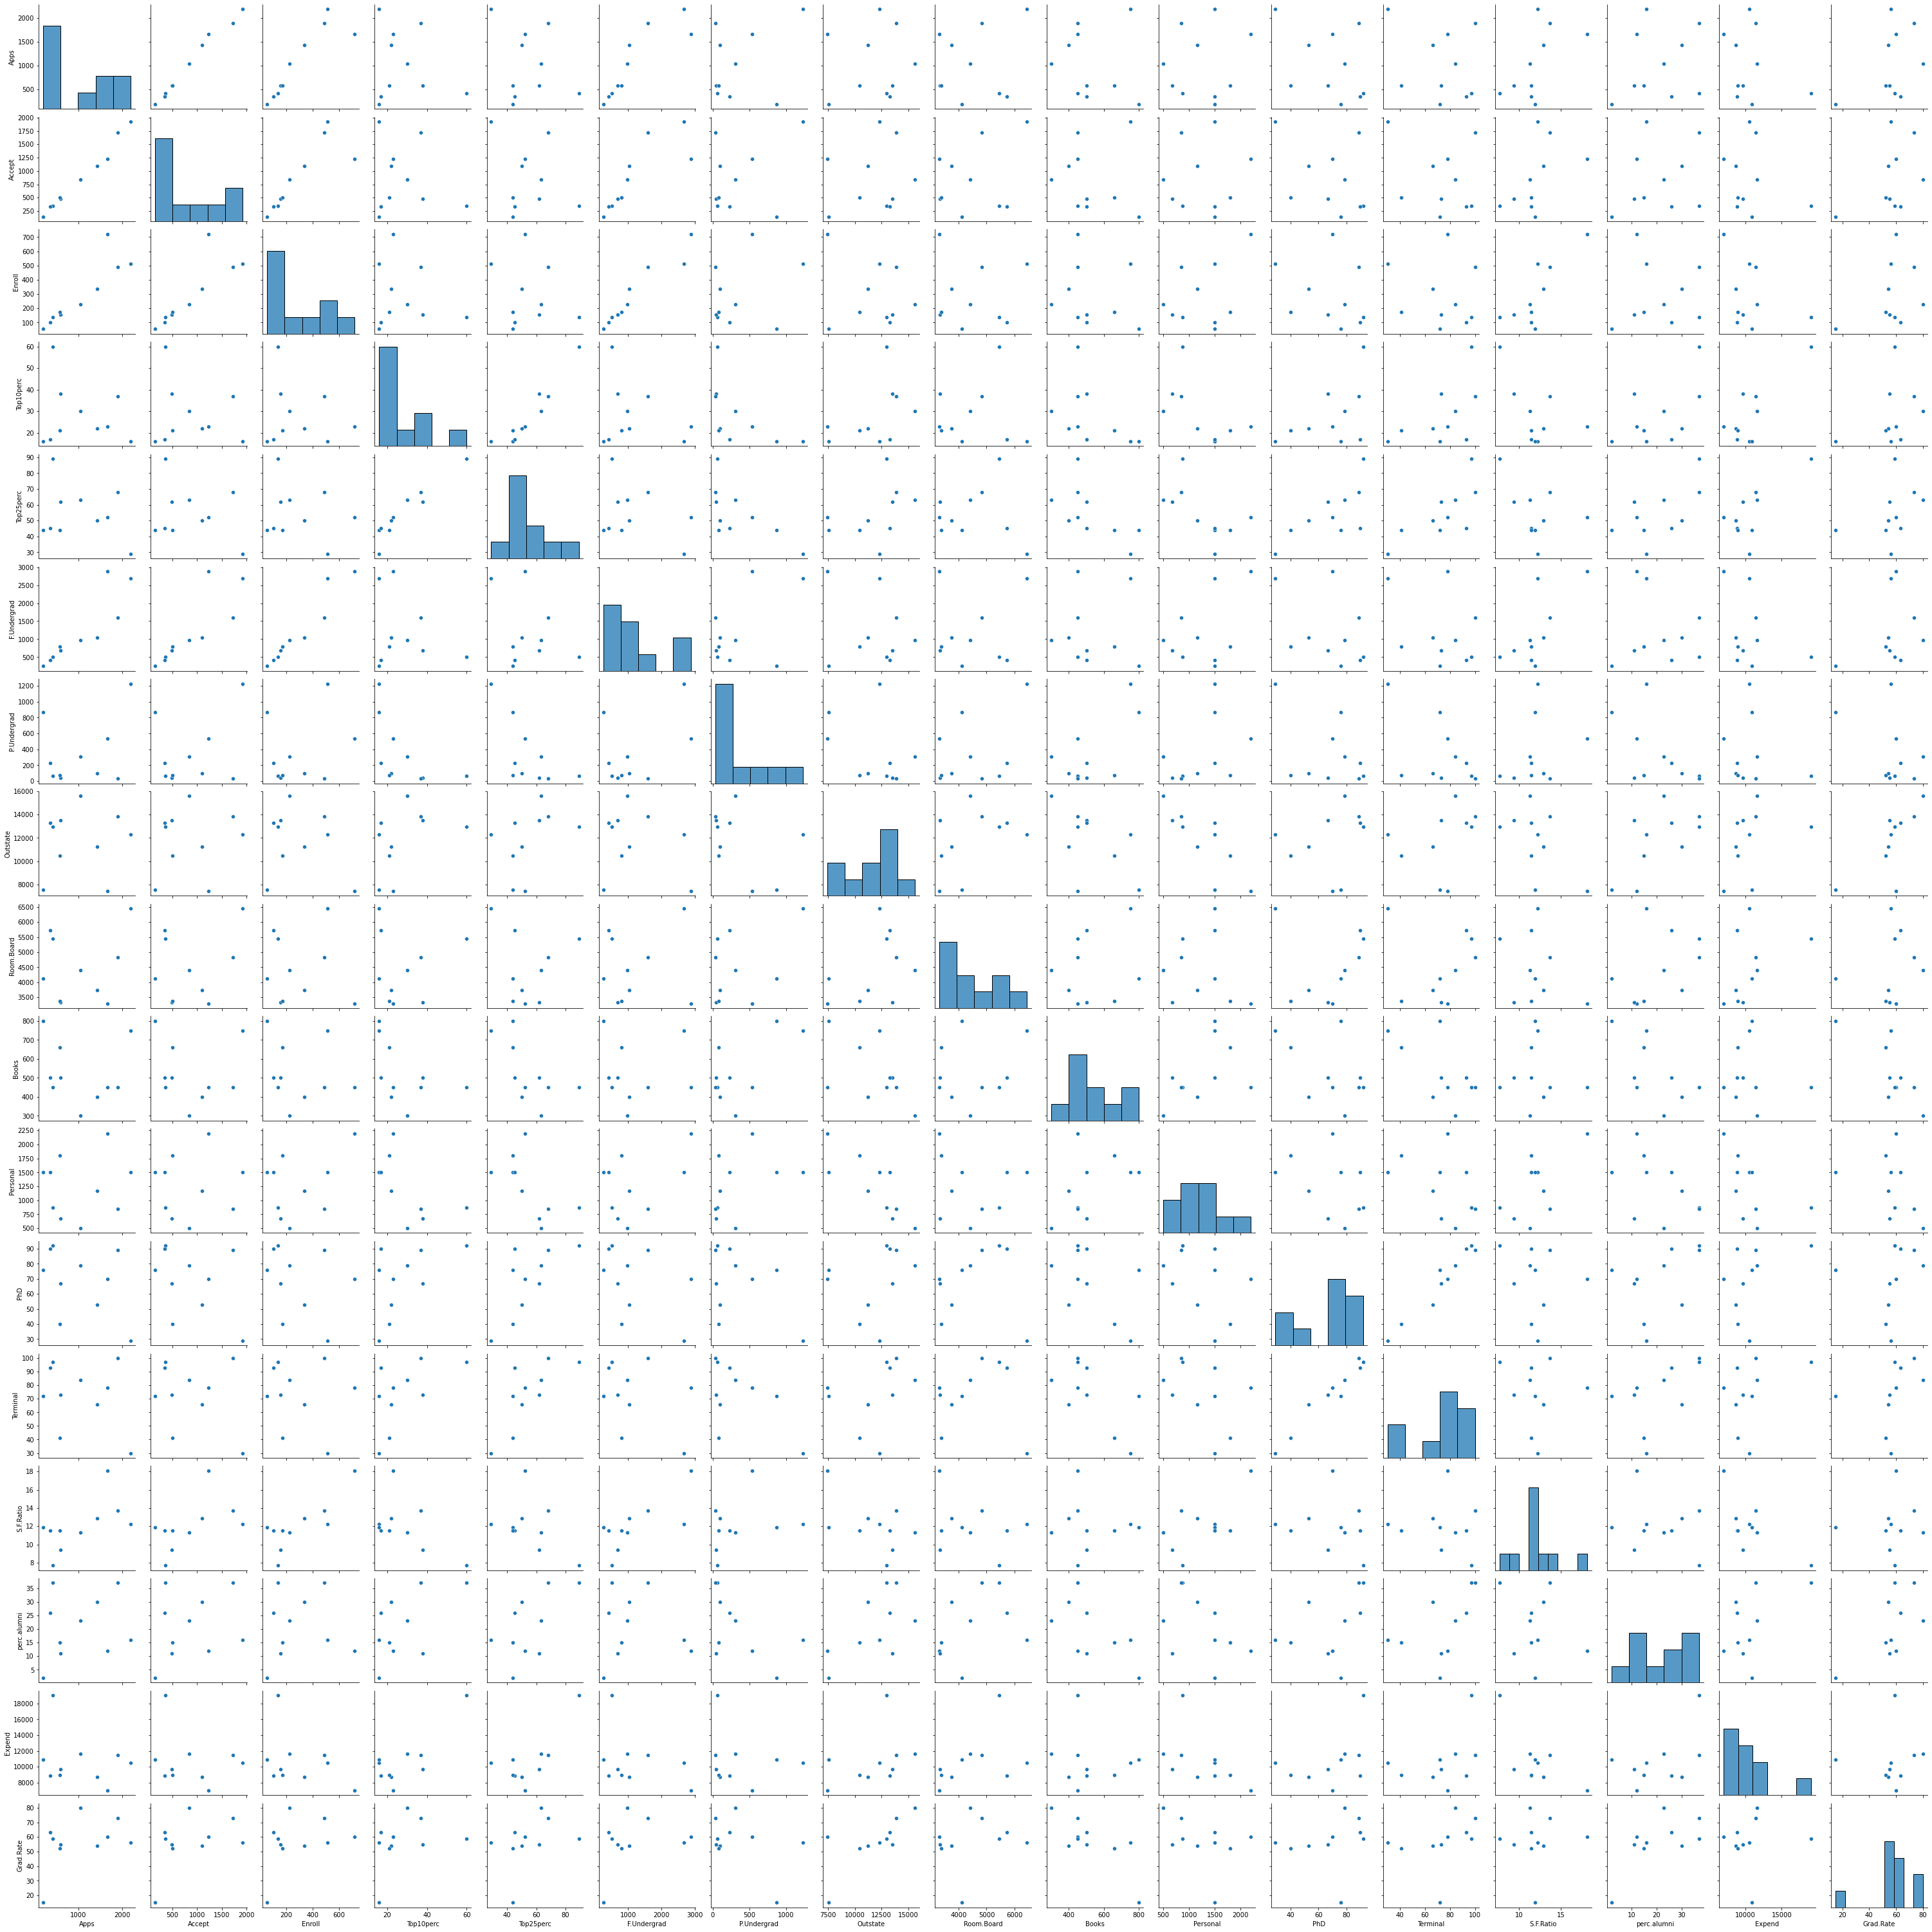

In [4]:
# 散布図行列
sns.pairplot(college.head(10))

[Text(1, 0, 'Private No')]

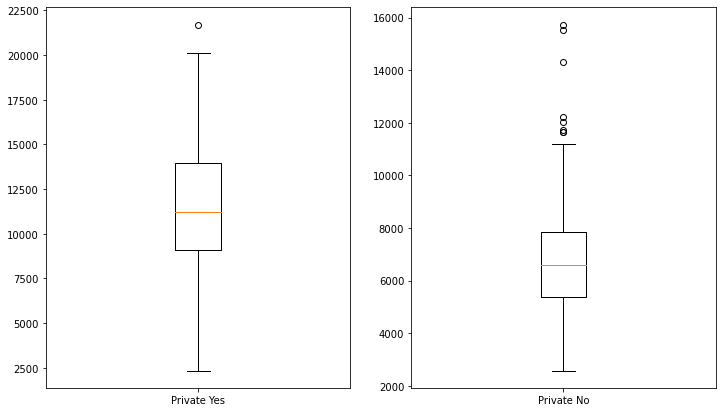

In [5]:
# 箱ひげ図作成のためにPrivateのYes/Noでデータ分割
outstate_private_yes = college.where(college['Private'] == 'Yes')
outstate_private_yes = outstate_private_yes['Outstate'].dropna().values
outstate_private_no = college.where(college['Private'] == 'No')
outstate_private_no = outstate_private_no['Outstate'].dropna().values

# OutStateとPrivateの箱ひげ図
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.boxplot(outstate_private_yes)
ax1.set_xticklabels(['Private Yes'])
ax2.boxplot(outstate_private_no)
ax2.set_xticklabels(['Private No'])

In [6]:
# Elite列を追加
college['Elite'] = [
    'Yes' if top10perc >= 50 else 'No'
    for top10perc in college['Top10perc']
]

In [7]:
# EliteがYesの数
college['Elite'].value_counts()

No     694
Yes     83
Name: Elite, dtype: int64

[Text(1, 0, 'elite No')]

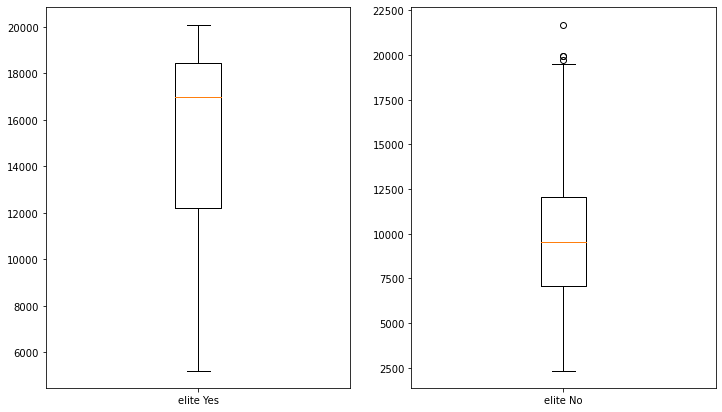

In [8]:
# 箱ひげ図作成のためにPrivateのYes/Noでデータ分割
outstate_elite_yes = college.where(college['Elite'] == 'Yes')
outstate_elite_yes = outstate_elite_yes['Outstate'].dropna().values
outstate_elite_no = college.where(college['Elite'] == 'No')
outstate_elite_no = outstate_elite_no['Outstate'].dropna().values

# OutStateとeliteの箱ひげ図
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.boxplot(outstate_elite_yes)
ax1.set_xticklabels(['elite Yes'])
ax2.boxplot(outstate_elite_no)
ax2.set_xticklabels(['elite No'])

array([[<AxesSubplot:title={'center':'Private'}>,
        <AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>],
       [<AxesSubplot:title={'center':'Top10perc'}>,
        <AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>,
        <AxesSubplot:title={'center':'P.Undergrad'}>],
       [<AxesSubplot:title={'center':'Outstate'}>,
        <AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>],
       [<AxesSubplot:title={'center':'PhD'}>,
        <AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>],
       [<AxesSubplot:title={'center':'Expend'}>,
        <AxesSubplot:title={'center':'Grad.Rate'}>,
        <AxesSubplot:title={'center':'Elite'}>, <AxesSubplot:>]],
      dtype=obje

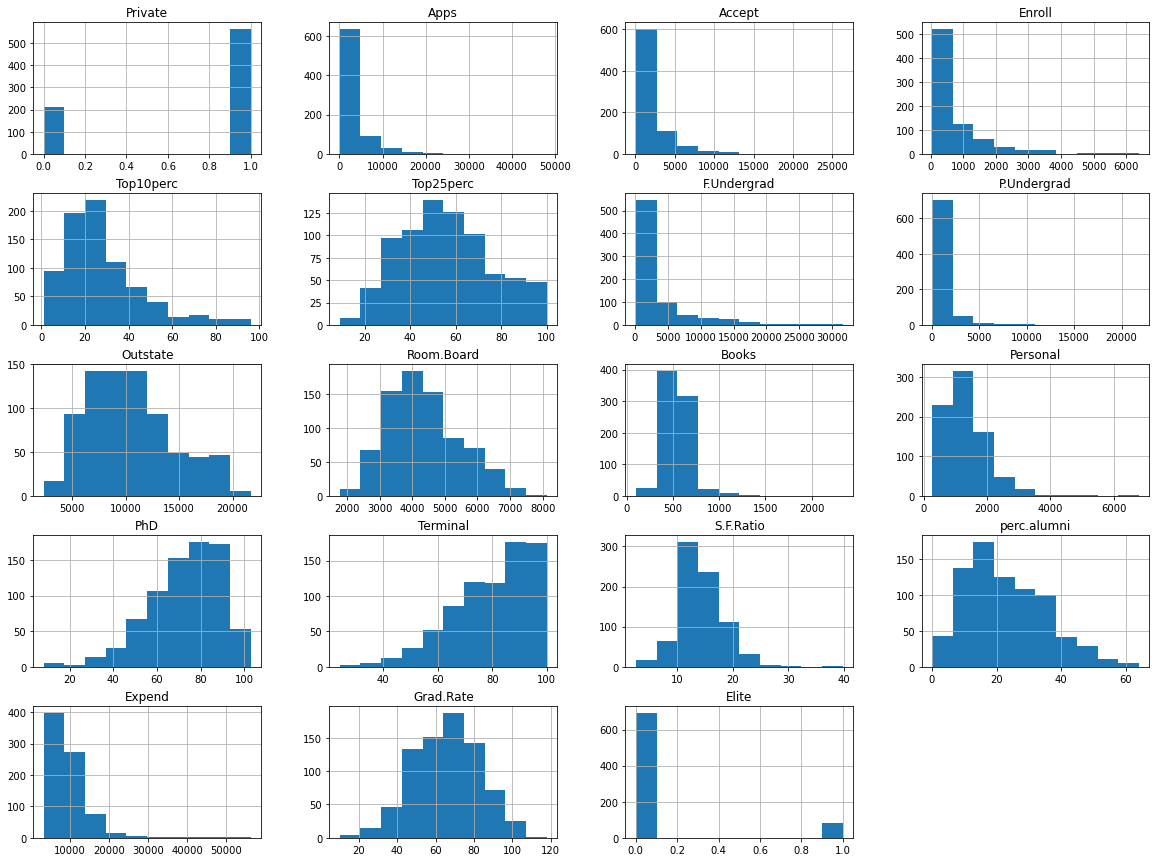

In [9]:
# ヒストグラムを作成
college_hist = college.copy()
college_hist['Elite'] = college_hist['Elite'].map({'Yes': 1, 'No': 0})
college_hist['Private'] = college_hist['Private'].map({'Yes': 1, 'No': 0})

college_hist.hist(figsize=(20, 15))

<AxesSubplot:>

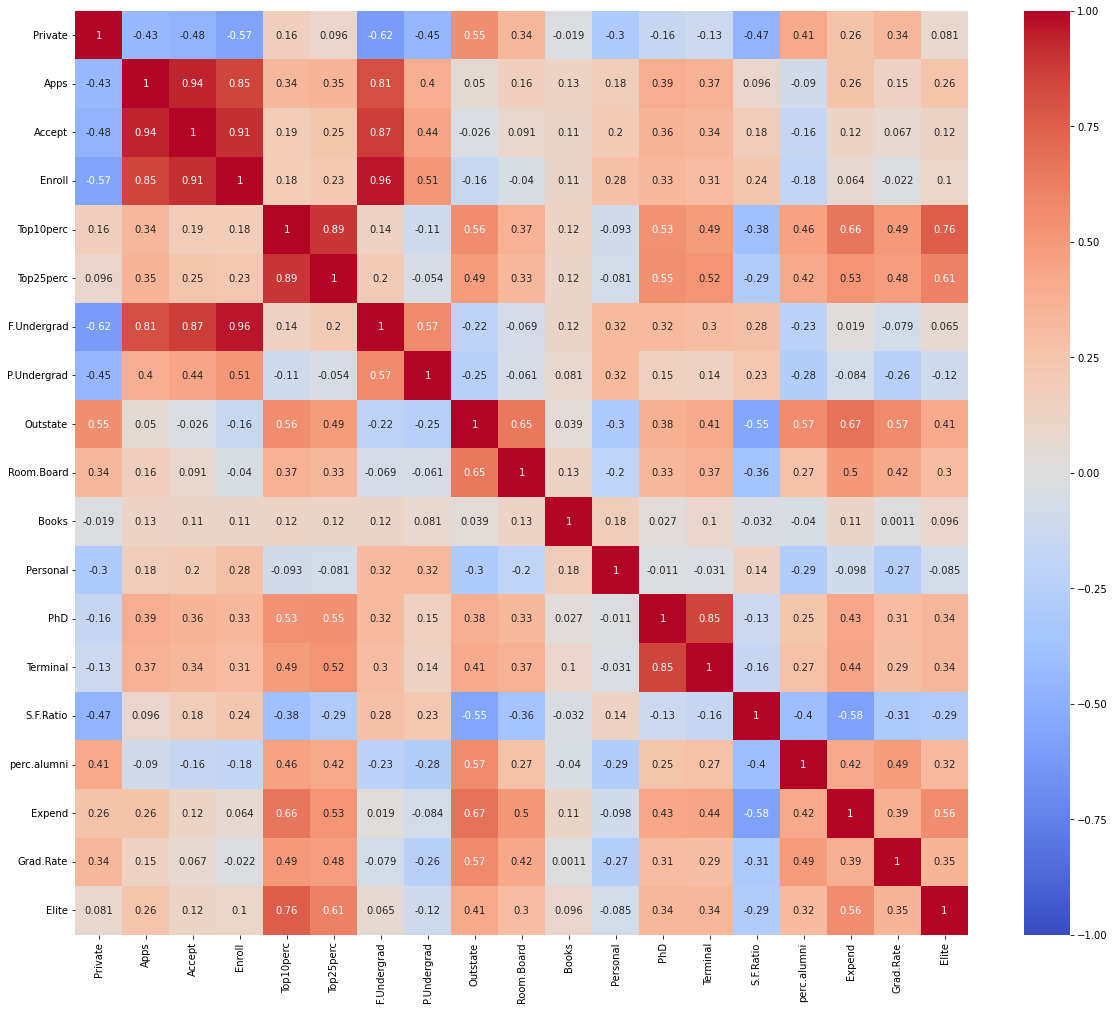

In [10]:
# 相関係数
fig, ax = plt.subplots(figsize=(20, 17))
college_corr = college_hist.corr()
sns.heatmap(college_corr, annot=True, ax=ax, cmap='coolwarm', vmax=1, vmin=-1, center=0)

### (9) (a) ~ (f)

In [11]:
# Autoデータ読み込み
auto = pd.read_csv('../data/Auto.csv')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


質的変数はcylinders, nameの二つ。  
量的変数は量的変数であげたもの以外の変数

In [12]:
# horsepowerが？となっている行を削除
auto = auto.drop(auto[auto['horsepower'] == '?'].index)

# horsepowerをObjectからIntに変換
auto['horsepower'] = auto['horsepower'].values.astype(int)

In [13]:
# 量的変数について、取りうる範囲や統計量を表示
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
# 10~85番目のデータを削除して、取りうる範囲や統計量を表示
auto_dropped = auto.copy()
auto_dropped = auto_dropped.drop(auto_dropped.index[10: 86])
auto_dropped.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.75000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.50000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.00000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000


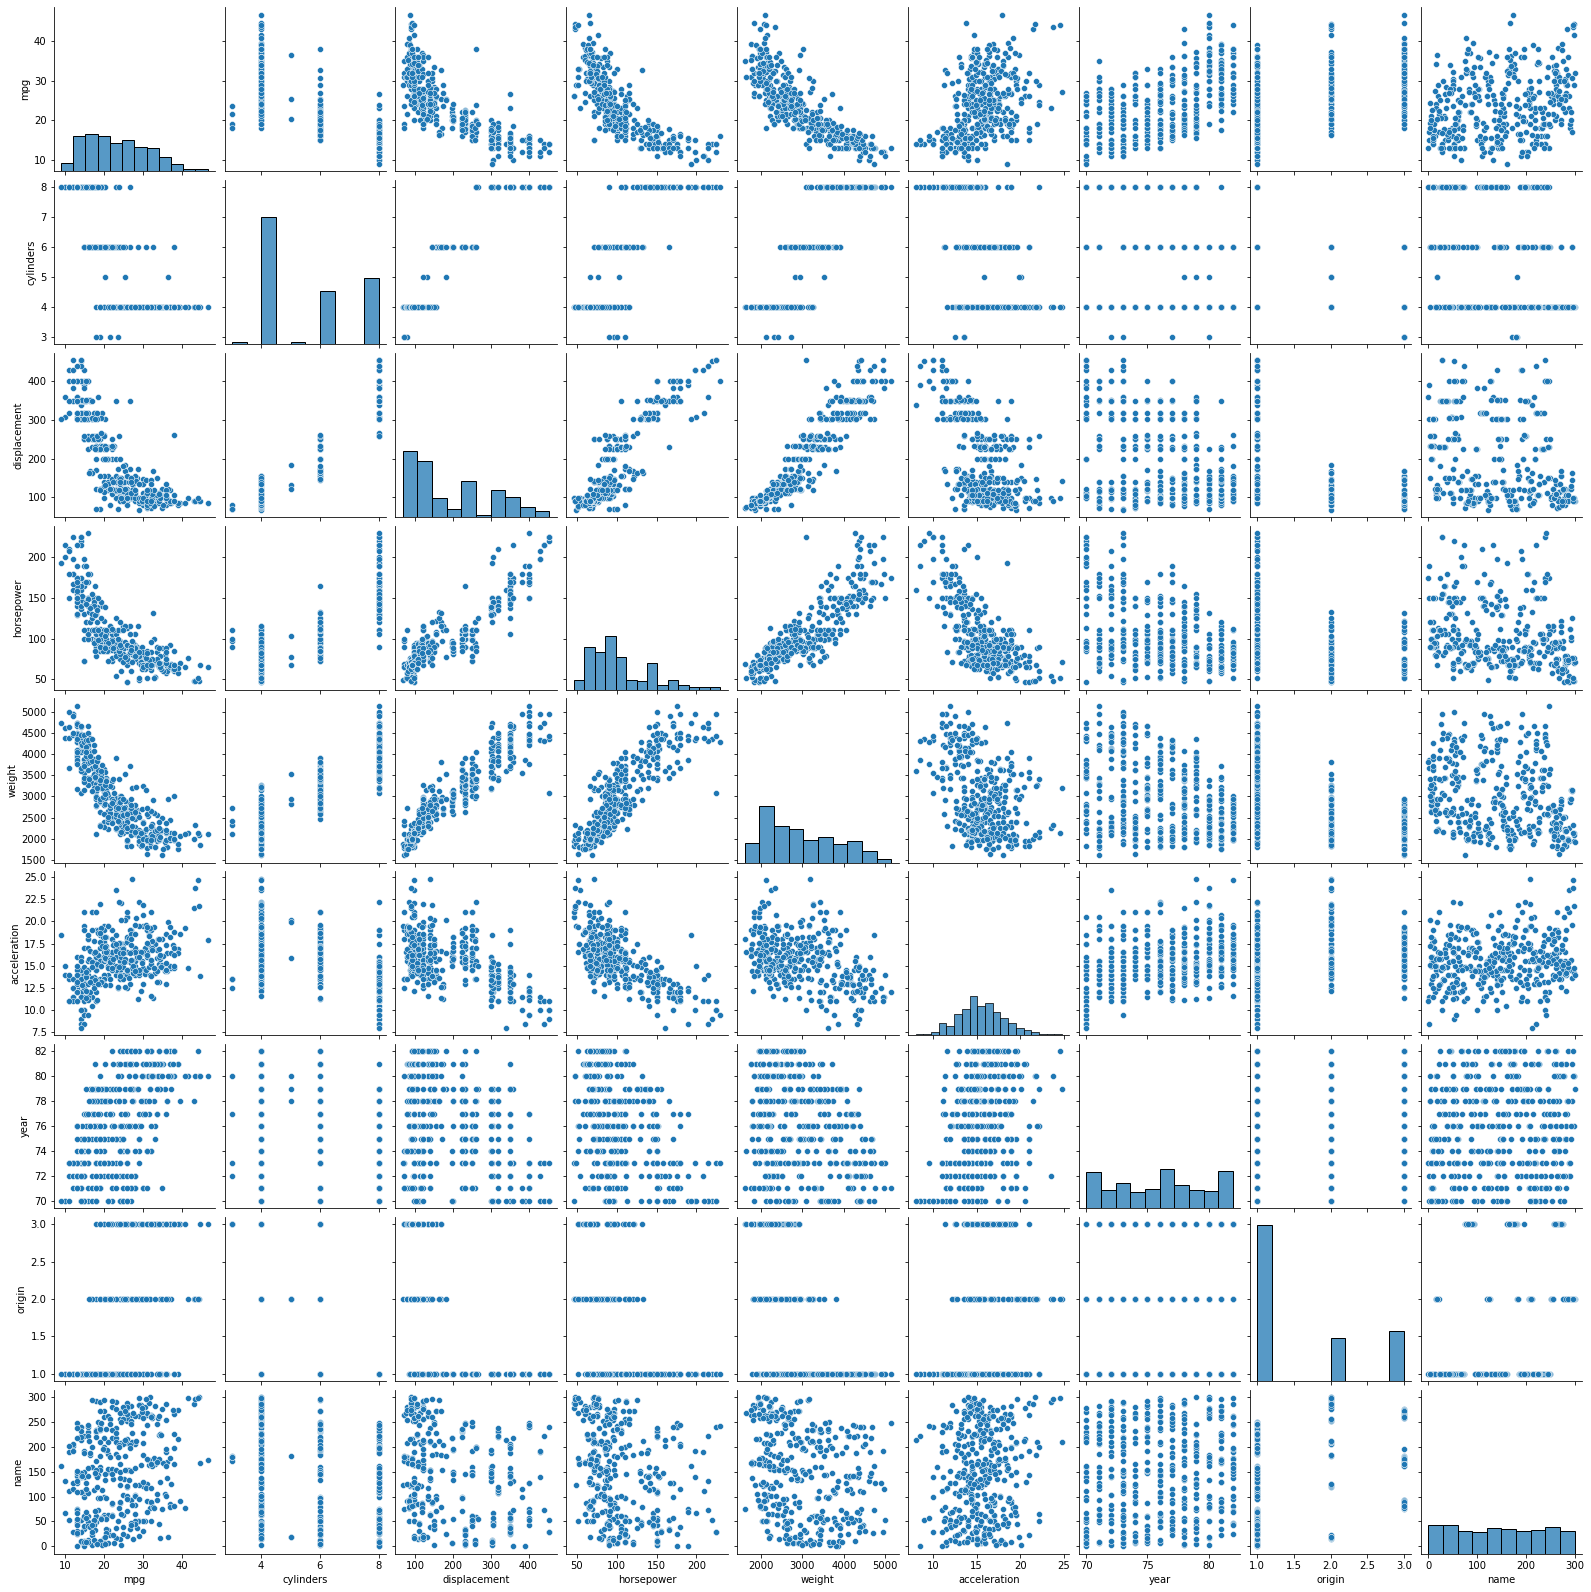

In [15]:
# nameを数値に変換
auto_digitized = auto.copy()
name_cat = pd.Categorical(auto_digitized['name'])
auto_digitized['name'] = name_cat.codes

# 散布図を作成
sns.pairplot(auto_digitized)

<AxesSubplot:>

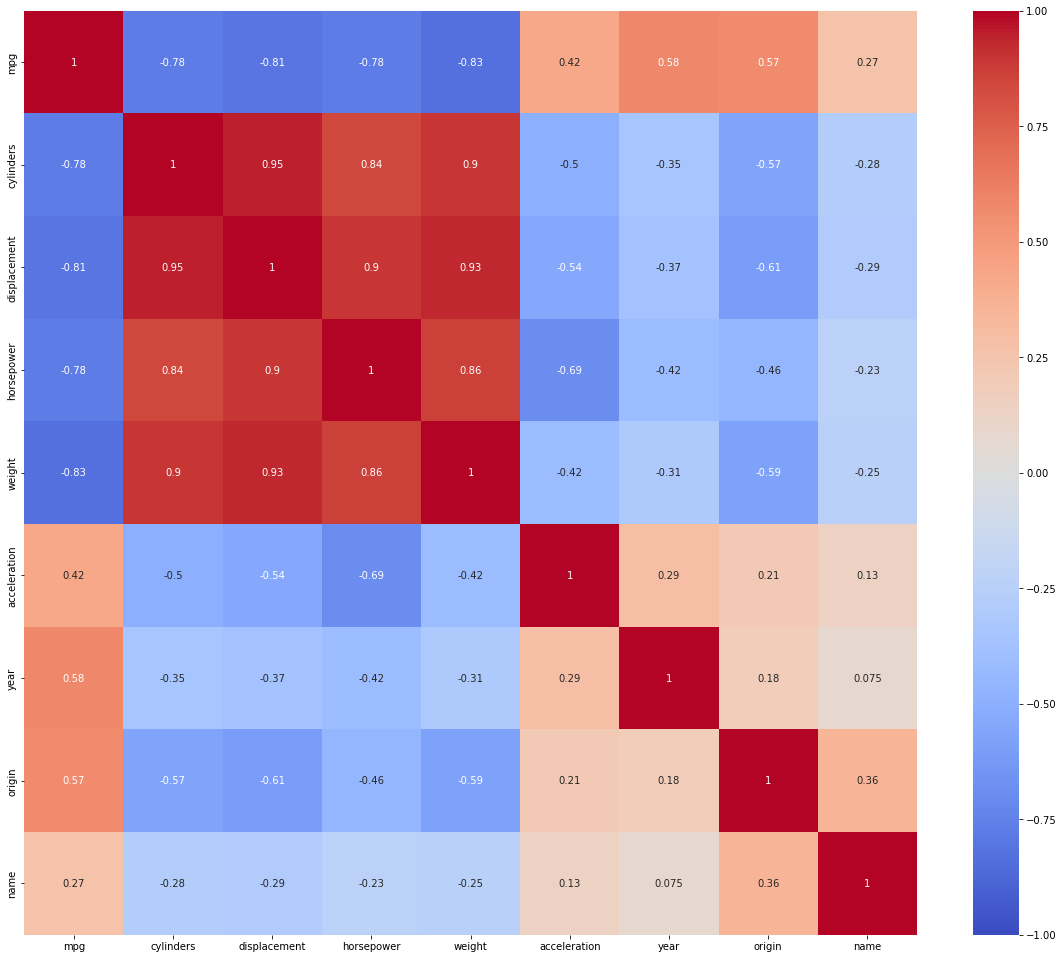

In [16]:
# 相関係数
fig, ax = plt.subplots(figsize=(20, 17))
auto_corr = auto_digitized.corr()
sns.heatmap(auto_corr, annot=True, ax=ax, cmap='coolwarm', vmax=1, vmin=-1, center=0)

mpgを予測するために、適していると思われる変数は相関係数の値から、  
'cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin'
があげられる。  
ただし、'cylinders', 'displacement', 'horsepower', 'weight'については互いに相関関係にあるため、共線性を考慮する必要がある。

### (10) (a) ~ (h)

In [17]:
boston = pd.read_csv('../data/boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


crim: 町ごとの一人当たりの犯罪率。  
zn: 25,000平方フィート以上の敷地に区分された住宅地の割合。  
indus: 非小売業の土地面積の町ごとの割合。  
chas: チャールズ川のダミー変数（河川に接する地域は1、それ以外は0）。  
nox: 一酸化窒素濃度（1000万分の1単位）。  
rm: 住宅ごとの平均部屋数。  
age: 1940年以前に建てられたオーナー居住ユニットの割合。  
dis: ボストンの5つの雇用センターへの距離の重み付き平均。  
rad: 放射状高速道路へのアクセス性の指数。  
tax: $10,000当たりの不動産の全額課税率。  
ptratio: 町ごとの児童と教師の比率。  
black: 町ごとの黒人割合に基づく値（1000(Bk-0.63)^2）。  
lstat: 人口の下位層の割合（パーセント）。  
medv: オーナー居住の家屋の中央値（千ドル単位）。  
  
https://r-data.pmagunia.com/dataset/r-dataset-package-mass-boston

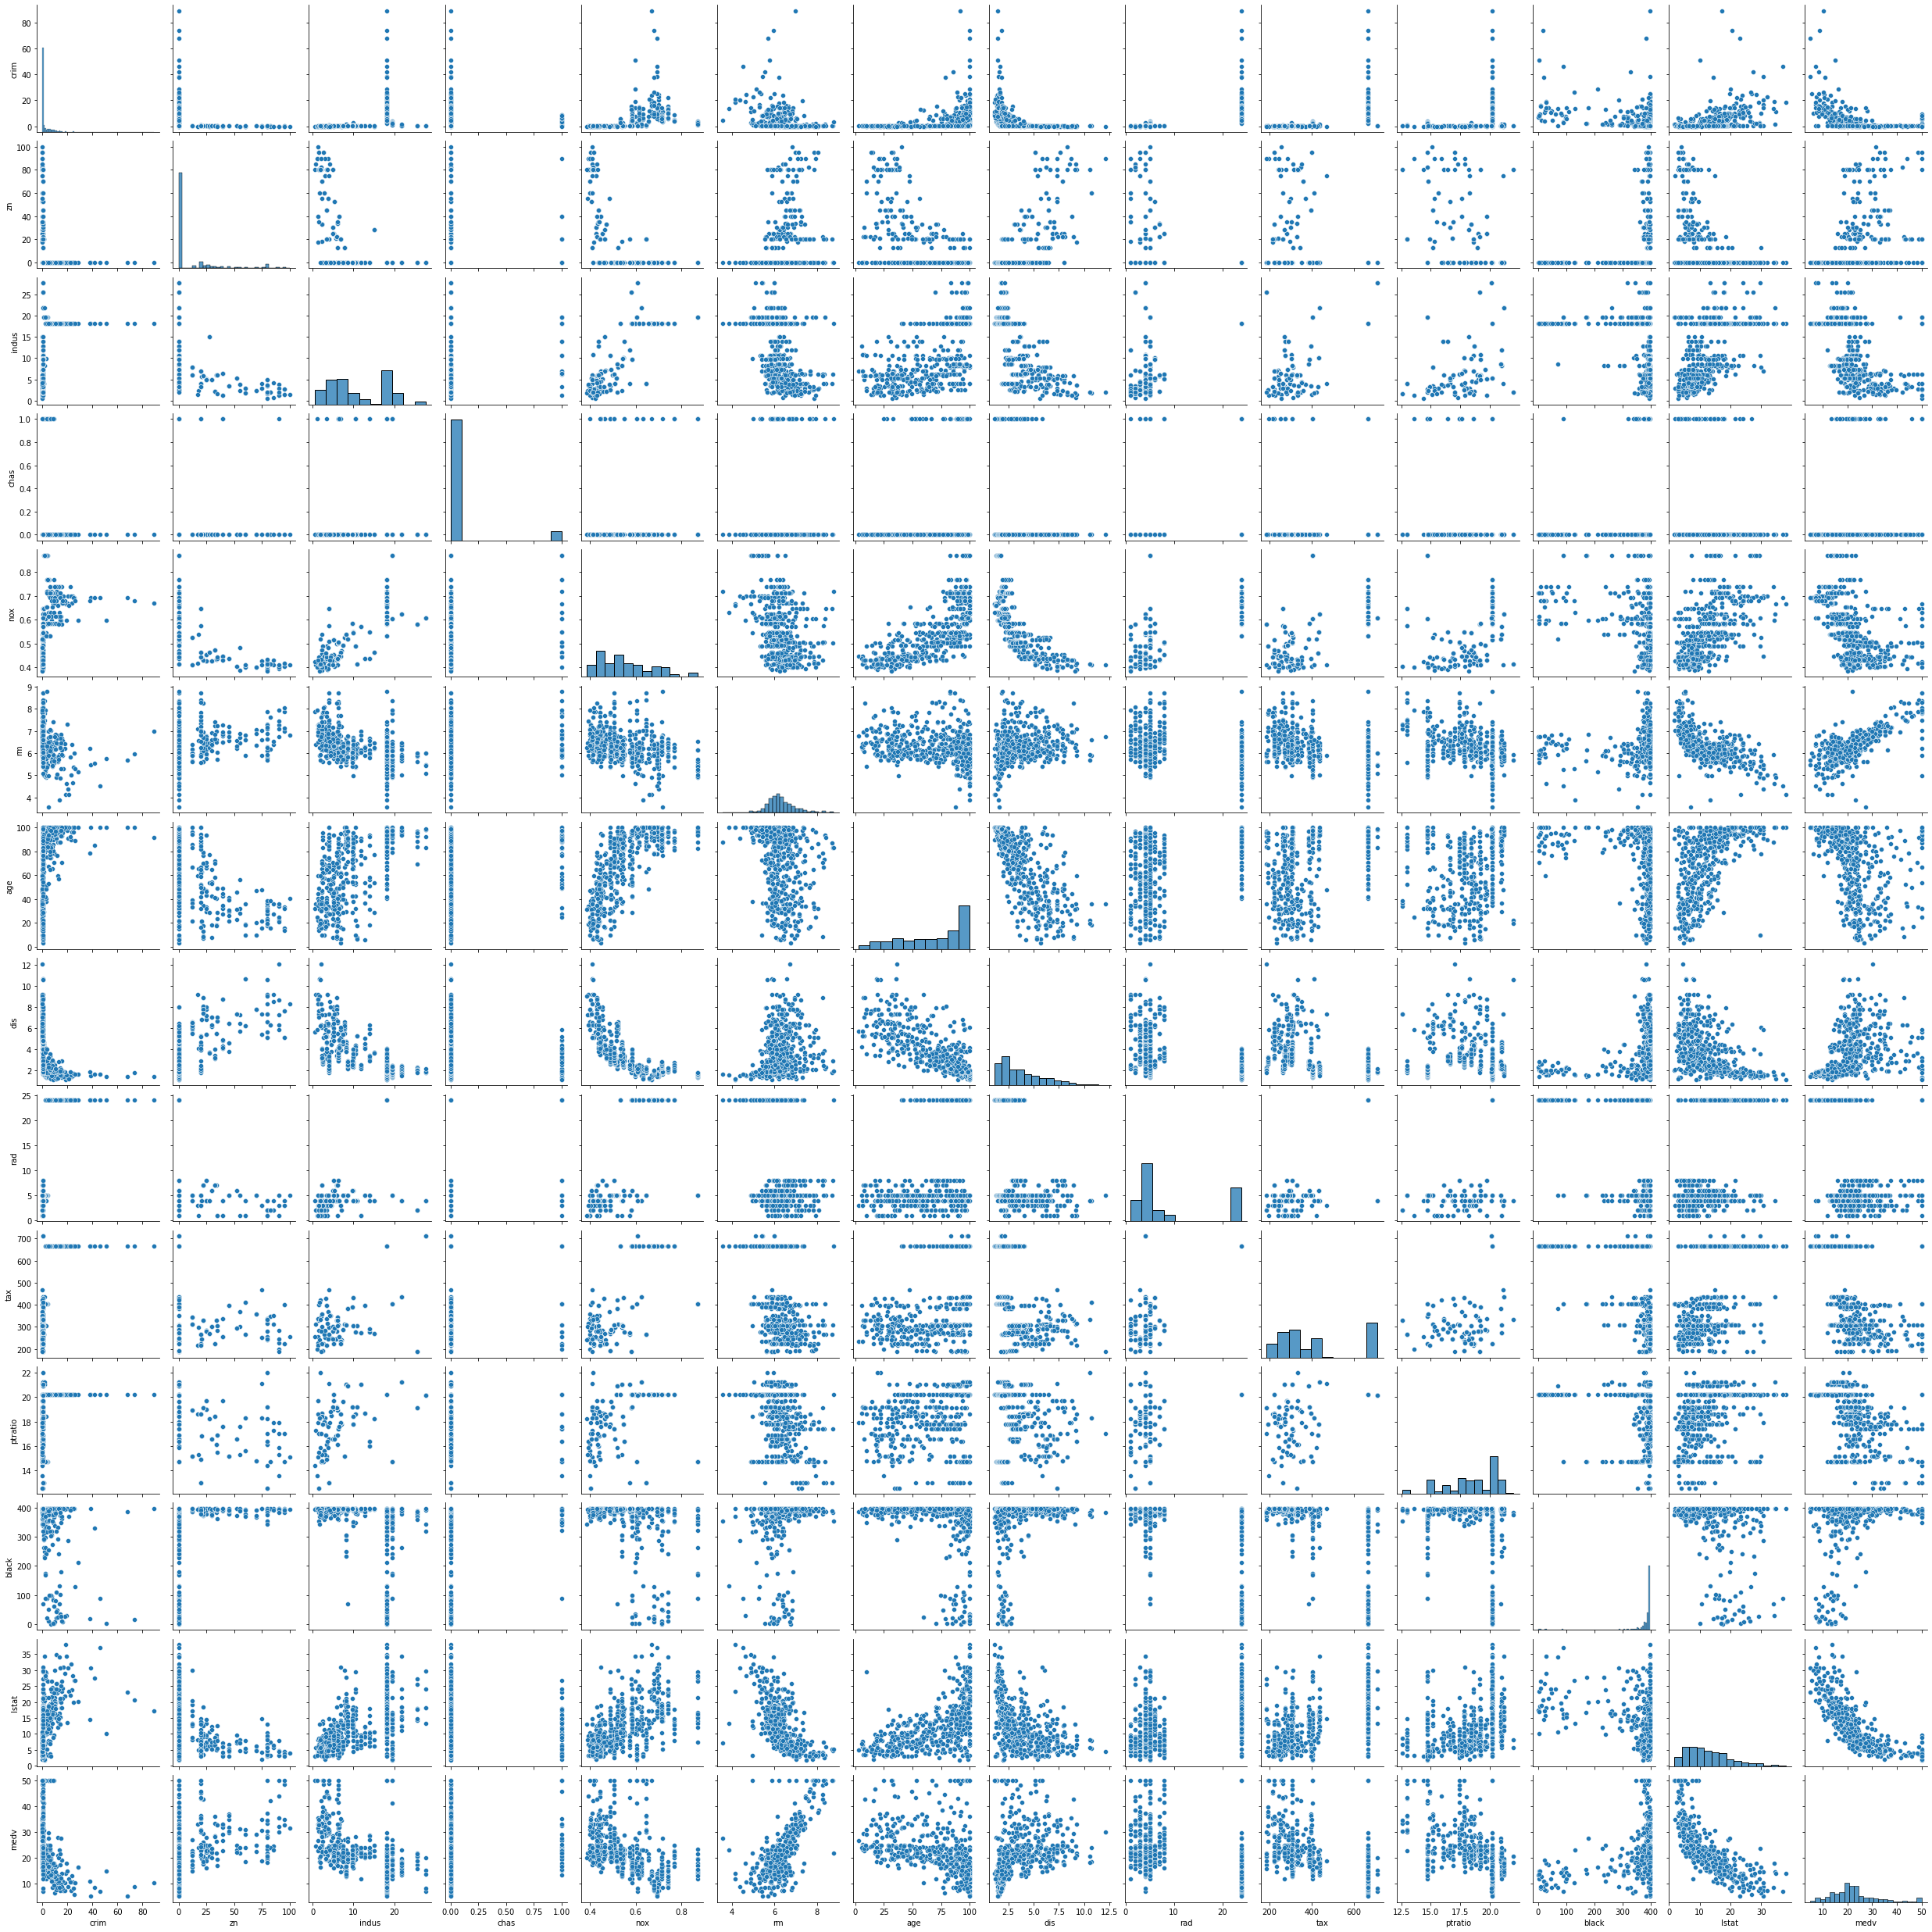

In [18]:
# 散布図を作成
sns.pairplot(boston)

<AxesSubplot:>

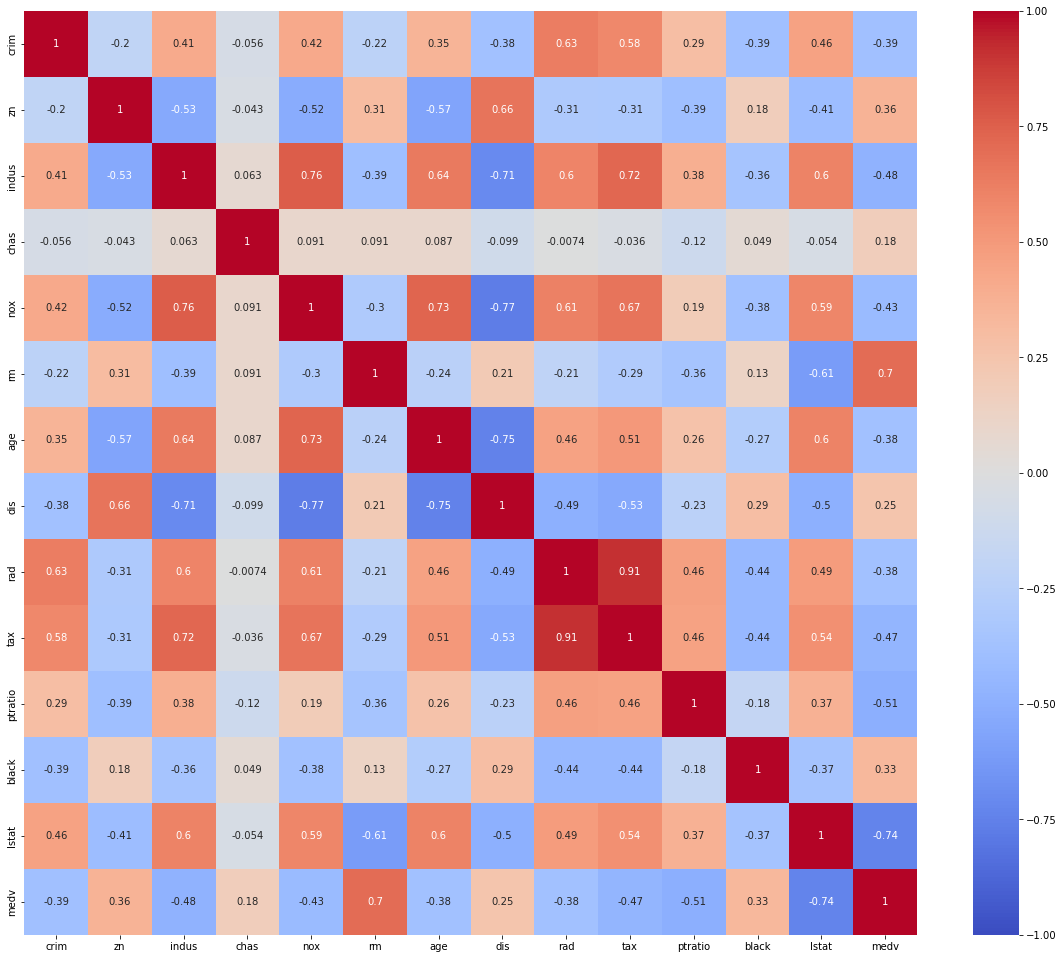

In [19]:
# 相関係数
fig, ax = plt.subplots(figsize=(20, 17))
boston_corr = boston.corr()
sns.heatmap(boston_corr, annot=True, ax=ax, cmap='coolwarm', vmax=1, vmin=-1, center=0)

相関係数からCrimと関係がありそうな変数を抜き出すと、'rad', 'tax'が関係がありそうに見えるが、散布図を確認すると、特定の値の時にのみCrimが変動しているような挙動となっているため、相関係数で示されているほど関係があるようには見えない。  
'nox', 'rm', 'age', 'dis', 'lstat', 'medv'は散布図を見ると、Crimと関連があるように見える。

In [20]:
# 犯罪率が高い
len(boston[boston['crim'] > 50])

4

In [21]:
# 税率が高い
len(boston[boston['tax'] > 500])

137

In [22]:
# 教師と児童の比率が高い
len(boston[boston['ptratio'] > 20])

201

In [23]:
# crim, tax, ptratioの各変数の範囲
boston[['crim', 'tax', 'ptratio']].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


In [24]:
# 川に面している数
len(boston[boston['chas'] == 1])

35

In [25]:
# 教師と児童の比率の中央値
boston['ptratio'].median()

19.05

In [26]:
# 家価格の中央値が最も低いデータを取得
params_min_medv = boston[boston['medv'] == boston['medv'].min()]
params_min_medv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [27]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


家価格の中央値が最も低いデータは2つあるため、代表してIndex398のデータについて考察する  
crim: 平均以上かつ上位25％に含まれる値となるため、犯罪率は高いエリア  
zn: 0となっているため、広大な敷地の住宅地はないエリア  
indus: 平均以上かつ上位25%に含まれる値となるため、非小売業の土地面積が大きいエリア  
chas: 0となっているため、川には面していない  
nox: 平均以上かつ上位25％に含まれる値となるため、一酸化窒素濃度は高いエリア  
rm: 平均以下かつ下位25％に含まれる値となるため、平均部屋数は少ないエリア  
age: 100となっているため、すべてのオーナー住居ユニットが1940年以前インたてられている  
dis: 平均以下かつ下位25％に含まれる値となるため、雇用センターまでの距離は近いエリア  
rad: 最大値をとっているため、ボストンの中で最も放射状高速道路へのアクセス性が良いエリア  
tax: 平均以上かつ上位25％に含まれる値となるため、課税率は高いエリア  
ptratio: 平均以上かつ上位25％に含まれる値となるため、児童と教師の比率は高いエリア  
black: 最大値をとっているため、ボストンの中で最も黒人割合が高いエリア  
lstat: 平均以上かつ上位25％に含まれる値となるため、下位層の割合が高いエリア  
medv: 平均以下かつ下位25％に含まれる値となるため、家屋価格の中央値は低いエリア

In [28]:
# 平均部屋数が7以上
len(boston[boston['rm'] >= 7.0])

64

In [29]:
# 平均部屋数が8以上
len(boston[boston['rm'] >= 8.0])

13

In [30]:
boston[boston['rm'] >= 8.0]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
